Libraries and modules

In [390]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler

Reading the dataset

In [391]:
df = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Handling missing values and outliers

In [392]:
df["Loan_ID"].isnull().sum()

0

In [393]:
df["Loan_ID"].count()

614

In [394]:
for i in df.columns:
    print(f"Percentage of missing values in the column {i}: {df[i].isnull().sum()*100/614}")

Percentage of missing values in the column Loan_ID: 0.0
Percentage of missing values in the column Gender: 2.1172638436482085
Percentage of missing values in the column Married: 0.48859934853420195
Percentage of missing values in the column Dependents: 2.44299674267101
Percentage of missing values in the column Education: 0.0
Percentage of missing values in the column Self_Employed: 5.2117263843648205
Percentage of missing values in the column ApplicantIncome: 0.0
Percentage of missing values in the column CoapplicantIncome: 0.0
Percentage of missing values in the column LoanAmount: 3.583061889250814
Percentage of missing values in the column Loan_Amount_Term: 2.2801302931596092
Percentage of missing values in the column Credit_History: 8.143322475570033
Percentage of missing values in the column Property_Area: 0.0
Percentage of missing values in the column Loan_Status: 0.0


In [395]:
df = df.drop(["Loan_ID"], axis = 1)

In [396]:
for i in ["Gender", "Married", "Dependents", "Self_Employed", "Loan_Amount_Term", "Credit_History"]:
    df[i].fillna(df[i].mode()[0], inplace = True)

In [397]:
df["LoanAmount"].fillna(df["LoanAmount"].mean(), inplace = True)

In [398]:
df = pd.get_dummies(df)

In [399]:
for i in ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]:
    df = df[(np.abs(stats.zscore(df[i])) < 3)]

In [400]:
for i in ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1

    df = df[~((df[i]<(q1-1.5*iqr)) | (df[i]>(q3+1.5*iqr)))]

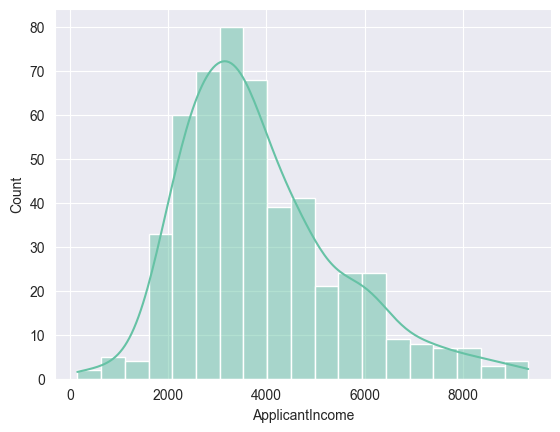

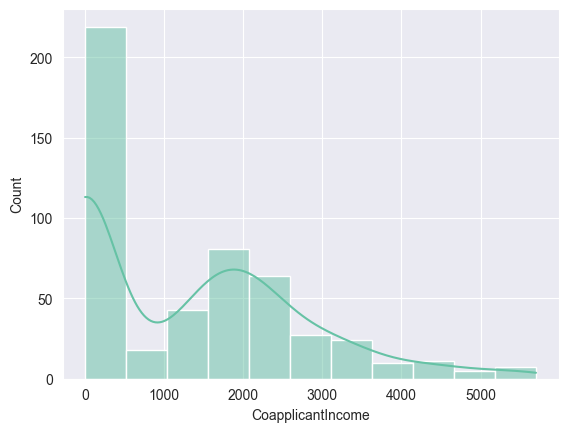

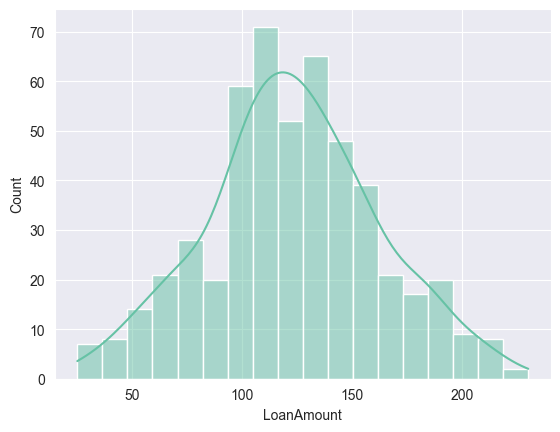

In [401]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

sns.histplot(df, x = "ApplicantIncome", kde = True)
plt.show()

sns.histplot(df, x = "CoapplicantIncome", kde = True)
plt.show()

sns.histplot(df, x = "LoanAmount", kde = True)
plt.show()

Handling skewness

In [402]:
scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [403]:
df["ApplicantIncome"] = np.sqrt(df["ApplicantIncome"])
df["CoapplicantIncome"] = np.sqrt(df["CoapplicantIncome"])

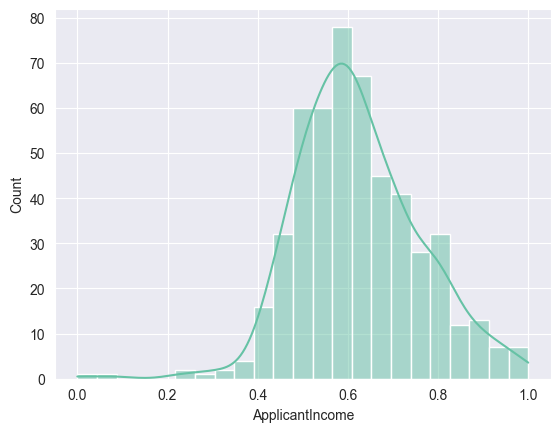

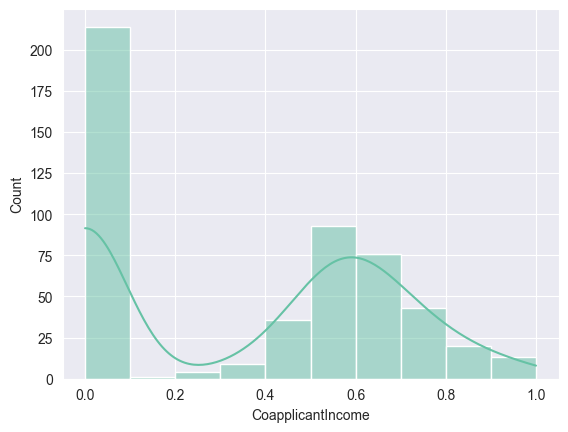

In [404]:
sns.histplot(df, x = "ApplicantIncome", kde = True)
plt.show()

sns.histplot(df, x = "CoapplicantIncome", kde = True)
plt.show()

!!!!!  JESTE  POROVNAT  S  BOXCOX  !!!!!!!!!!!!

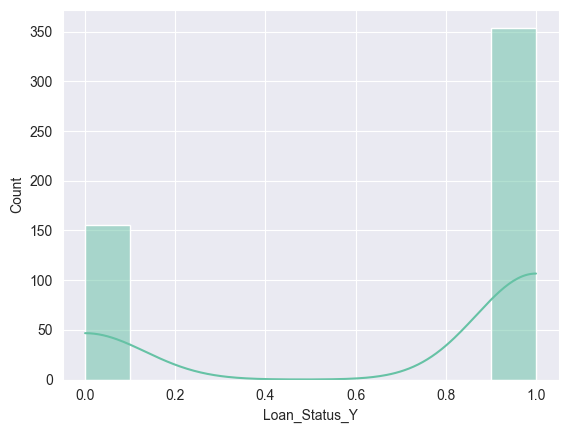

In [405]:
sns.histplot(df, x = "Loan_Status_Y", kde = True)
plt.show()

In [406]:
X = df.drop(["Loan_Status_Y"], axis=1)
y = df["Loan_Status_Y"]

In [407]:
oversample = RandomOverSampler(sampling_strategy = "minority")
X, y = oversample.fit_resample(X, y)